## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [1]:
# Your code here - remember to use markdown cells for comments as well!
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
data = pd.read_csv('data/Aviation_Data.csv')

/Users/abigailcampbell/anaconda3/envs/learn-env/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (6,7,28) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


# Data Exploration:

In [3]:
data.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.9222,-81.8781,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      90348 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

# Data Cleaning:
    1. Drop columns that are not going to be useful to the data analysis.
    2. Filter out all data not related to airplanes
    3. Drop rows that don't contain a make/model of airplane (0.03% of Make rows, 0.1% of Model rows)

In [5]:
# drop columns that won't be useful to the data analysis

df = data.drop(['Air.carrier', 'Country', 'Airport.Code', 'Schedule', 'Location', 'Accident.Number', 'Amateur.Built', 'Registration.Number', 'Publication.Date'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      90348 non-null  object 
 2   Event.Date              88889 non-null  object 
 3   Latitude                34382 non-null  object 
 4   Longitude               34373 non-null  object 
 5   Airport.Name            52790 non-null  object 
 6   Injury.Severity         87889 non-null  object 
 7   Aircraft.damage         85695 non-null  object 
 8   Aircraft.Category       32287 non-null  object 
 9   Make                    88826 non-null  object 
 10  Model                   88797 non-null  object 
 11  Number.of.Engines       82805 non-null  float64
 12  Engine.Type             81812 non-null  object 
 13  FAR.Description         32023 non-null  object 
 14  Purpose.of.flight       82697 non-null

In [6]:
# Filter out all data that is not confirmed to be related to airplanes

df = df.groupby('Aircraft.Category').get_group('Airplane')

In [7]:
# remove NaN values from the Make and Model column, since we are recommending which airplanes to invest in

df = df.dropna(axis=0, subset=['Make', 'Model'])

Investigation of NaN numbers for Injuriy severity, and aircraft damage

    Injury Severity:
        - 812 occurrances
        - there is an "Unavailable: category that all NaN numbers can be wrapped into 
        - The 'Fatal' occurrances also include how many fatalities. 
            - This data is already captured in the "Total Fatal Injuries" column

    Aircraft Damage:
        - 1279 occurances
        - there is an "Unknown" category that all NaN numbers can be wrapped into
    

In [8]:
# df['Aircraft.damage'].value_counts()
# df['Aircraft.damage'].isna().sum()

# df['Injury.Severity'].value_counts()
df['Injury.Severity'].isna().sum()

812

In [9]:
# replace NaN with "Unavailable" in the Injury.Severity column
df['Injury.Severity'] = df['Injury.Severity'].fillna('Unavailable')

# replace NaN with "Unknown" in the Aircraft.Damage column
df['Aircraft.damage'] = df['Aircraft.damage'].fillna('Unknown')

In [10]:
# remove the fatality count from the injury severity column
df['Injury.Severity'] = df['Injury.Severity'].map(lambda x: 'Fatal' if 'Fatal' in x else x)

Investigate Number of Engines and Engine Type categories

    Number of Engines:
        - 2749 occurrances of NaN
        - no unknown category to wrap them into
            - create new category
        - number of engines is a float - should be an int type

    Engine Type:
        - 4213 occurances of NaN
        - UNK category that NaN can be wrapped into

In [11]:
# df['Number.of.Engines'].value_counts()
# df['Number.of.Engines'].isna().sum()

# df['Engine.Type'].value_counts()
df['Engine.Type'].isna().sum()

4213

In [12]:
# replace NaN with UNK in Number.of.Engines column
df['Number.of.Engines'] = df['Number.of.Engines'].fillna('UNK')

# replace NaN with UNK in Engine.Type column
df['Engine.Type'] = df['Engine.Type'].fillna('UNK')

In [13]:
# change data type of Number.of.Engines column to int64
df['Number.of.Engines'] = df['Number.of.Engines'].map(lambda x: int(x) if x != 'UNK' else x)

Investigate FAR Description and Purpose of Flight categories

    FAR Description:
        - 499 occurrances of NaN
        - Unknown category that NaN can be wrapped into
        - 'UNK' category to also be wrapped into 'Uknown'
        - a few split categories: 091 and Part 91: General Aviation & others that should be combined

    Engine Type:
        - 3730 occurances of NaN
        - Unknown category that NaN can be wrapped into

In [14]:
# df['FAR.Description'].value_counts()
# df['FAR.Description'].isna().sum()
# df['Purpose.of.flight'].value_counts()
df['Purpose.of.flight'].isna().sum()

3730

In [15]:
# replace NaN with Unknown in FAR.Description column
df['FAR.Description'] = df['FAR.Description'].fillna('Unknown')
df['FAR.Description'] = df['FAR.Description'].map(lambda x: 'Unknown' if 'UNK' in x else x)

# hard coding cleaning up specific FAR Descriptions
df['FAR.Description'] = df['FAR.Description'].map(lambda x: 'Part 91: General Aviation' if '091' in x else x)
df['FAR.Description'] = df['FAR.Description'].map(lambda x: 'Part 137: Agricultural' if '137' in x else x)
df['FAR.Description'] = df['FAR.Description'].map(lambda x: 'Part 135: Air Taxi & Commuter' if '135' in x else x)
df['FAR.Description'] = df['FAR.Description'].map(lambda x: 'Part 121: Air Carrier' if '121' in x else x)
df['FAR.Description'] = df['FAR.Description'].map(lambda x: 'Part 129: Foreign' if '129' in x else x)
df['FAR.Description'] = df['FAR.Description'].map(lambda x: 'Part 125: 20+ Pax,6000+ lbs' if '125' in x else x)
df['FAR.Description'] = df['FAR.Description'].map(lambda x: 'Part 107: Remote Pilot' if '107' in x else x)
df['FAR.Description'] = df['FAR.Description'].map(lambda x: 'Part 91 Subpart K: Fractional' if '091K' in x else x)

df['FAR.Description'] = df['FAR.Description'].map(lambda x: 'Armed Forces' if 'ARMF' in x else x)
df['FAR.Description'] = df['FAR.Description'].map(lambda x: 'Public Use' if 'PUBU' in x else x)
df['FAR.Description'] = df['FAR.Description'].map(lambda x: 'Public Use' if 'Public Aircraft' in x else x)

# replace NaN with Unknown in Purpose.of.flight column
df['Purpose.of.flight'] = df['Purpose.of.flight'].fillna('Uknown')

Investigate Injury Count Columns

    Total Fatal Injuries
        - 3159 occurrances of NaN
        - no unknown category to wrap them into
        - total injures is a float - should be an int type
    
    Total Serious Injuries
        - 3216 occurrances of NaN
        - no unknown category to wrap them into
        - total injures is a float - should be an int type
    
    Total Minor Injuries
        - 2871 occurrances of NaN
        - no unknown category to wrap them into
        - total injures is a float - should be an int type

    Total Uninjured
        - 894 occurrances of NaN
        - no unknown category to wrap them into
        - total injures is a float - should be an int type
    
*** since there are currently no unknown or unavailable categories existing for these columns, I will leave NaN as it's own category for now.

In [16]:
# df['Total.Fatal.Injuries'].value_counts()
# df['Total.Fatal.Injuries'].isna().sum()

# df['Total.Serious.Injuries'].value_counts()
# df['Total.Serious.Injuries'].isna().sum()

# df['Total.Minor.Injuries'].value_counts()
# df['Total.Minor.Injuries'].isna().sum()

# df['Total.Uninjured'].value_counts()
df['Total.Uninjured'].isna().sum()

894

In [17]:
# convert injury count to integers for all injury columns
# df['Total.Fatal.Injuries'].value_counts()
# df['Total.Fatal.Injuries'].map(lambda x: x if pd.isna(x) else int(x)).value_counts()
# df['Total.Fatal.Injuries'].astype('int64')

Investigate Weather condition and phase of flight Columns

    Weather Condition
        - 3044 occurrances of NaN
        - 2 unknown categories: Unk and UNK - combine and wrap NaN into it

    Broad Phase of Flight    
        - 21195 occurrances of NaN
        - Unknown category to wrap NaN values into
        - there is a massive amount of unknown records - it may be better to remove this one eventually


In [18]:
# df['Weather.Condition'].value_counts()
# df['Weather.Condition'].isna().sum()

# df['Broad.phase.of.flight'].value_counts()
df['Broad.phase.of.flight'].isna().sum()

21195

In [19]:
# replace NaN and 'Unk' with 'UNK' in the Weather.Condition column
df['Weather.Condition'] = df['Weather.Condition'].map(lambda x: 'UNK' if x == 'Unk' else x)
df['Weather.Condition'] = df['Weather.Condition'].fillna('UNK')

# replace NaN with 'Unknown' in the Broad.phase.of.flight column
df['Broad.phase.of.flight'] = df['Broad.phase.of.flight'].fillna('Unknown')

Investigate Airport Name, Latitude, and Longitude

    Airport Name:
        - Several versions of 'Private' all exist - can combine into 1
    

In [20]:
# hard coding cleaning up specific Airport Names
df['Airport.Name'] = df['Airport.Name'].map(lambda x: 'Private' if 'Private' in str(x) else x)
df['Airport.Name'] = df['Airport.Name'].map(lambda x: 'Private' if 'private' in str(x) else x)
df['Airport.Name'] = df['Airport.Name'].map(lambda x: 'Private' if 'PRIVATE' in str(x) else x)
df['Airport.Name'] = df['Airport.Name'].map(lambda x: 'Private' if 'PVT' in str(x) else x)
df['Airport.Name'] = df['Airport.Name'].map(lambda x: 'Private' if 'Pvt' in str(x) else x)
df['Airport.Name'] = df['Airport.Name'].map(lambda x: 'Private' if 'pvt' in str(x) else x)
df['Airport.Name'] = df['Airport.Name'].map(lambda x: 'NONE' if x == 'None' else x)

Ivestigate Make and Model:

    Make: some name duplicates - combin
    Both: uniform name formatting

In [21]:
# Reformat Make and Model to have a uniform structure
df['Make'] = df['Make'].map(lambda x: x.title())
df['Model'] = df['Model'].map(lambda x: x.title())

In [132]:
# hard coding cleaning up specific Makes - focussing on the top makes that might make it in the top 10 
df['Make'] = df['Make'].map(lambda x: 'Boeing' if 'Boeing' in str(x) else x)
df['Make'] = df['Make'].map(lambda x: 'Cessna' if 'Cessna' in str(x) else x)
df['Make'] = df['Make'].map(lambda x: 'Piper' if 'Piper' in str(x) else x)
df['Make'] = df['Make'].map(lambda x: 'Beech' if 'Beech' in str(x) else x)
df['Make'] = df['Make'].map(lambda x: 'Mooney' if 'Mooney' in str(x) else x)
df['Make'] = df['Make'].map(lambda x: 'Air Tractor' if 'Air Tractor' in str(x) else x)
df['Make'] = df['Make'].map(lambda x: 'Cirrus' if 'Cirrus' in str(x) else x)
df['Make'] = df['Make'].map(lambda x: 'Grumman' if 'Grumman' in str(x) else x)
df['Make'] = df['Make'].map(lambda x: 'Airbus' if 'Airbus' in str(x) else x)
df['Make'] = df['Make'].map(lambda x: 'Aviat' if 'Aviat' in str(x) else x)
df['Make'] = df['Make'].map(lambda x: 'De Havilland' if 'Dehavilland' in str(x) else x)
df['Make'] = df['Make'].map(lambda x: 'Rockwell' if 'Rockwell' in str(x) else x)
df['Make'] = df['Make'].map(lambda x: 'Bombardier' if 'Bombardier' in str(x) else x)
df['Make'] = df['Make'].map(lambda x: 'British Aerospace' if 'Bae' in str(x) else x)

Filter out flights with personal or military purposes 
    - personal from purpose of flight 
    - part 91F, Armed Forces

In [23]:
df_filtered = df[df['Purpose.of.flight'] != 'Personal']
df_filtered = df_filtered[df_filtered['FAR.Description'] != 'Armed Forces']
df_filtered = df_filtered[df_filtered['FAR.Description'] != 'Part 91F: Special Flt Ops.']

Save the cleaned data for use in Tableau

In [135]:
df_filtered.to_csv('filtered_data.csv')

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27580 entries, 5 to 90345
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                27580 non-null  object 
 1   Investigation.Type      27580 non-null  object 
 2   Event.Date              27580 non-null  object 
 3   Latitude                22082 non-null  object 
 4   Longitude               22073 non-null  object 
 5   Airport.Name            18234 non-null  object 
 6   Injury.Severity         27580 non-null  object 
 7   Aircraft.damage         27580 non-null  object 
 8   Aircraft.Category       27580 non-null  object 
 9   Make                    27580 non-null  object 
 10  Model                   27580 non-null  object 
 11  Number.of.Engines       27580 non-null  object 
 12  Engine.Type             27580 non-null  object 
 13  FAR.Description         27580 non-null  object 
 14  Purpose.of.flight       27580 non-null

# Data Analysis

Make / model vs number of accidents
    - number of incidents 
    - column with make and model combined into 1
    
Note: top 10 manufactureres according to https://assetsamerica.com/aircraft-manufacturers/

Top 10 Commercial:
    1. Boeing (USA)
    2. Airbus (Netherlands)
    3. Embraer (Brazil)
    4. Bombardier (Canada)
    5. Comac (China)
    6. Mitsubishi Aircraft Corp (MAC)
    7. United Aircraft Corp. (UAC) (Russian)
    8. Aviastar-SP (Russian)
    9. GippsAero (AUS)
    10. Lockheed Martin
 
Top 10 Private:
    1. Airbus Corporate Jets (France)
    2. Boeing Business Jets (USA)
    3. Bombardier Business Aircraft (BBA) (Canada)
    4. Beechcraft (USA)
    5. Cessna (USA)
    6. Dessault Aviation (France)
    7. Embrarer (Brazil)
    8. Gulfstream Aerospace (USA)
    9. Pilatus Business Aircraft (Switzerland)
    10. Hawker (USA)

According to wikipedia: "Big Three" in field of general aviation manufacturing:
    - Cessna, Beechcraft, Piper
    
Mooney: lightweight, personal airplnes
Air Tractor: agriculture planes
Bellanca: (Italy)
Aviat: Sport and utility single engine (USA)


Look at the top 10 makes with the most accident reports

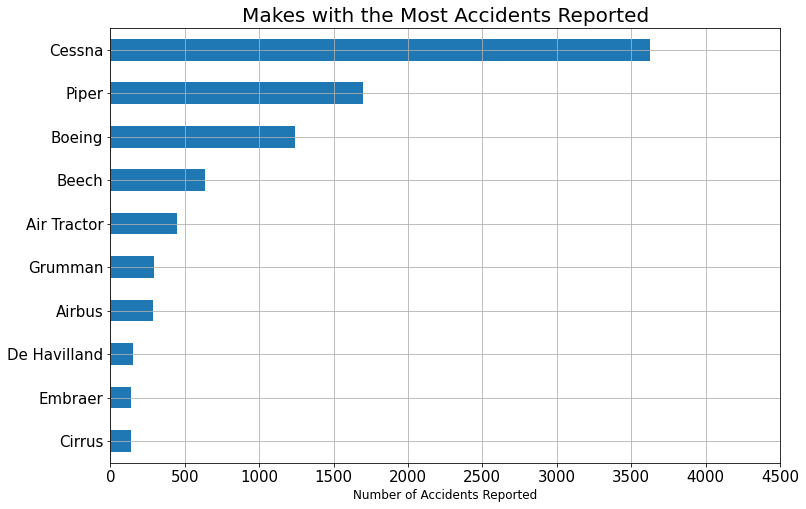

In [133]:
# plot top 10 makes with most reports
df_filtered['Make'].value_counts().head(10).sort_values().plot.barh(figsize=(12,8))
plt.title('Makes with the Most Accidents Reported', size=20)
plt.xlabel('Number of Accidents Reported', size=12)
plt.xlim(0,4500)
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)
plt.grid()

Aircraft makes without fatalities

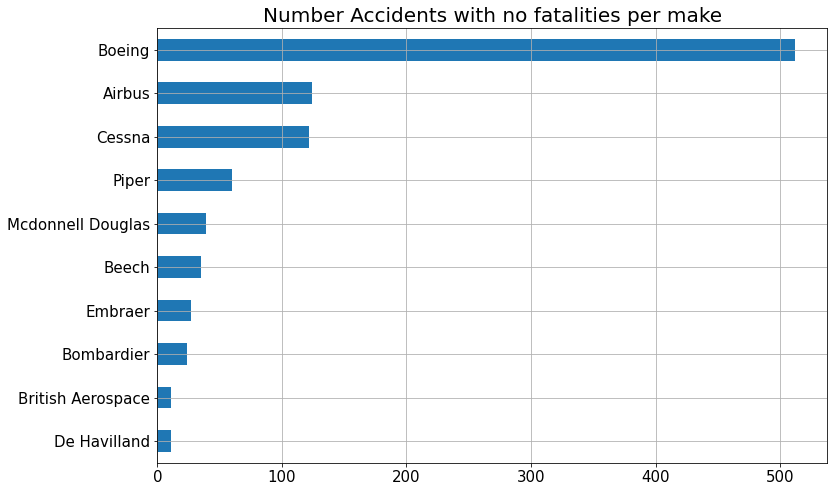

In [27]:
# get flight count with no fatalities
df_no_fatalities = df_filtered[df_filtered['Injury.Severity'] != 'Fatal']
no_fatalities_count = df_no_fatalities['Make'].value_counts()
no_fatalities_count.head(10).sort_values().plot.barh(figsize=(12,8))
plt.title('Number Accidents with no fatalities per make', size=20)
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)
plt.grid()

# make sure all makes are included
for make in df_filtered['Make']:
    if make not in no_fatalities_count.index:
        no_fatalities_count[make] = 0

# make value count into a dataframe
data = {
    'Make': no_fatalities_count.index,
    'N.Non.Fatal.Crashes': no_fatalities_count
}
df_non_fatal_crash_count = pd.DataFrame(data)


Aircraft models with fatalities

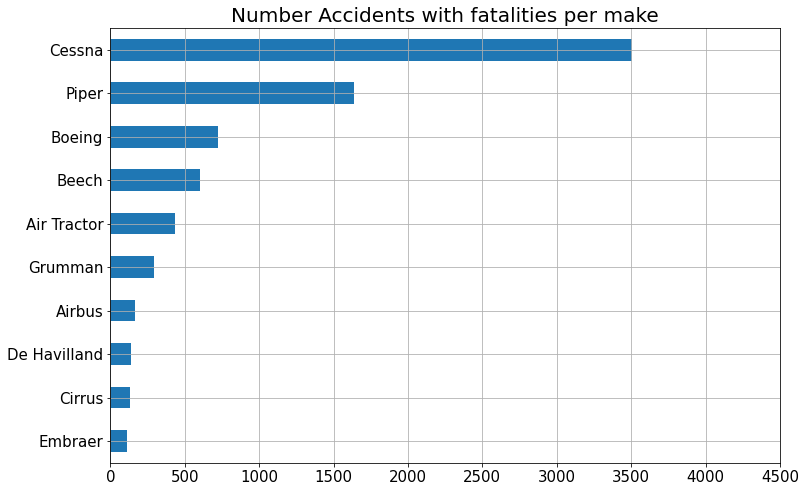

In [28]:
# get flight count with fatalities
df_fatalities = df_filtered[df_filtered['Injury.Severity'] == 'Fatal']
fatalities_count = df_fatalities['Make'].value_counts()
fatalities_count.head(10).sort_values().plot.barh(figsize=(12,8))

plt.title('Number Accidents with fatalities per make', size=20)
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)
plt.xlim(0, 4500)
plt.grid()

# make sure all makes are included
for make in df_filtered['Make']:
    if make not in fatalities_count.index:
        fatalities_count[make] = 0

# make value count into a dataframe
data = {
    'Make': fatalities_count.index,
    'N.Fatal.Crashes': fatalities_count
}
df_fatal_crash_count = pd.DataFrame(data)


Combine the two data sets to get a comprehensive count of fatal and non fatal crashes per make

In [29]:
# put together a dataframe with counts for flights resulting in fatal injures
df_fatal = df_fatal_crash_count.merge(df_non_fatal_crash_count)
df_fatal['Total.Crashes'] = df_fatal['N.Fatal.Crashes'] + df_fatal['N.Non.Fatal.Crashes']
df_fatal = df_fatal.sort_values(by=['Total.Crashes'], ascending=False).reset_index(drop=True)
df_fatal.head()

,Make,N.Fatal.Crashes,N.Non.Fatal.Crashes,Total.Crashes
0,Cessna,3508,122,3630
1,Piper,1635,60,1695
2,Boeing,726,512,1238
3,Beech,602,35,637
4,Air Tractor,438,10,448


Fatality Ratio: # of accidents with fatalities / total # of accidents

In [30]:
df_fatal['ratio.fatal.to.tot'] = round(df_fatal['N.Fatal.Crashes'] / df_fatal['Total.Crashes'], 3)
df_fatal.head(10)

,Make,N.Fatal.Crashes,N.Non.Fatal.Crashes,Total.Crashes,ratio.fatal.to.tot
0,Cessna,3508,122,3630,0.966
1,Piper,1635,60,1695,0.965
2,Boeing,726,512,1238,0.586
3,Beech,602,35,637,0.945
4,Air Tractor,438,10,448,0.978
5,Grumman,292,4,296,0.986
6,Airbus,164,124,288,0.569
7,De Havilland,139,11,150,0.927
8,Embraer,114,27,141,0.809
9,Cirrus,131,6,137,0.956


Save Fatal DF to CSV

In [139]:
df_fatal.to_csv('fatal_make_data.csv')

Plot ratios of top 10 makes with the most accident reports

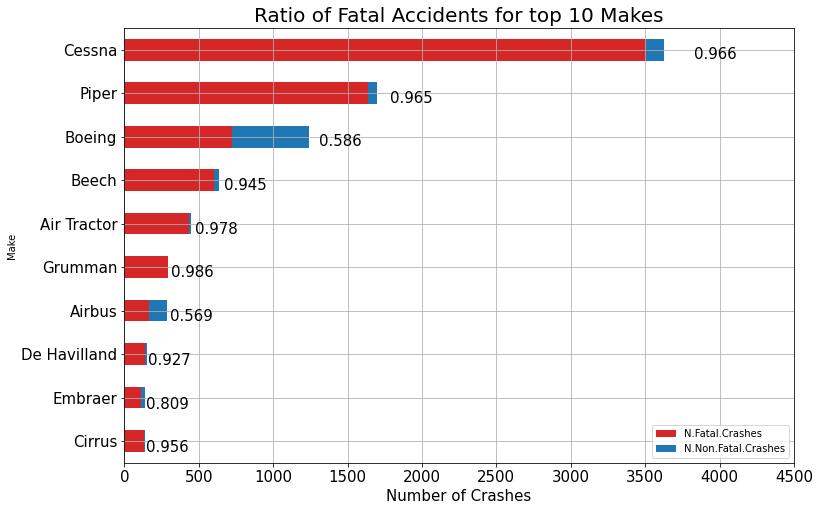

In [134]:
df_fatal_plot = df_fatal.head(10).sort_values(by='Total.Crashes').reset_index(drop=True)
ax = df_fatal_plot.plot(x='Make', y=['N.Fatal.Crashes', 'N.Non.Fatal.Crashes'], color=['tab:red', 'tab:blue'], kind="barh", stacked=True, figsize=(12,8))
ax.legend(bbox_to_anchor=(1, 1.02), loc='upper left')
ax.set_xlim(0, 4500)
ax.set_title('Ratio of Fatal Accidents for top 10 Makes', size=20)
ax.set_xlabel('Number of Crashes', size=15)
ax.legend()
ax.grid()

count = 0
for p in ax.patches:
    if p.xy[0] > 0:
        ax.annotate(df_fatal_plot['ratio.fatal.to.tot'][count], (df_fatal_plot['Total.Crashes'][count] * 1.055, p.get_y() * 1.005), size=15)
        count += 1

Plot of the makes with the lowest ratios

In [32]:
# exclude makes with less than 10 accidents reported - not enough data to get a good ratio. Also probalby not a very big company
df_ratio = df_fatal[df_fatal['Total.Crashes'] > 15]

In [33]:
df_ratio = df_ratio.sort_values(by='ratio.fatal.to.tot', ascending=True).reset_index(drop=True)
df_ratio.head(10)

,Make,N.Fatal.Crashes,N.Non.Fatal.Crashes,Total.Crashes,ratio.fatal.to.tot
0,Airbus,164,124,288,0.569
1,Boeing,726,512,1238,0.586
2,Atr,10,7,17,0.588
3,Mcdonnell Douglas,75,39,114,0.658
4,British Aerospace,22,11,33,0.667
5,Lockheed,21,6,27,0.778
6,Douglas,43,11,54,0.796
7,Bombardier,99,24,123,0.805
8,Embraer,114,27,141,0.809
9,Pilatus,13,3,16,0.812


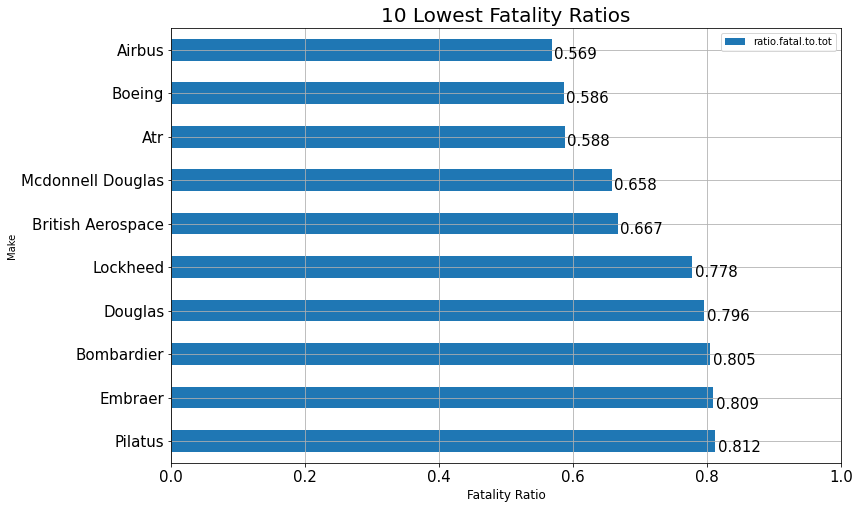

In [125]:
ax = df_ratio.head(10).sort_values(by='ratio.fatal.to.tot', ascending=False).plot('Make', 'ratio.fatal.to.tot', kind='barh', figsize=(12,8))
ax.set_title('10 Lowest Fatality Ratios', size=20)
ax.set_xlabel('Fatality Ratio', size=12)
ax.set_xlim(0,1)
ax.grid()

for p in ax.patches:
    ax.annotate(str(round(p.get_width(), 3)), (p.get_width() * 1.005, p.get_y() * 1.005), size=15)


Investigate accidents per year over time

In [55]:
# create a new column with the year
df_filtered['Year'] = df_filtered['Event.Date'].map(lambda x: int(x[0:4]))

# create a new df to sort by date
df_year = df_filtered.sort_values(by='Year')[['Make', 'Model', 'Year', 'Event.Date', 'Injury.Severity', 'Aircraft.damage']]

# remove years prior to 2012
df_year = df_year[df_year['Year'] >= 2012]
df_fatal_year = df_year[df_year['Injury.Severity'] == 'Fatal']

# group by year and make
df_group_year = df_year.groupby(['Make', 'Year'])
df_fatal_year_group = df_fatal_year.groupby(['Make', 'Year'])

df_group_year.head()


,Make,Model,Year,Event.Date,Injury.Severity,Aircraft.damage
72491,Boeing,747-400,2012,2012-08-17,Fatal,Unknown
72494,Air Tractor,At-502B,2012,2012-08-17,Fatal,Substantial
72496,Cessna,152,2012,2012-08-17,Fatal,Substantial
72500,Cessna,208B,2012,2012-08-18,Fatal,Substantial
72509,Paulistinha 56-C1,56-C1,2012,2012-08-18,Fatal,Substantial
...,...,...,...,...,...,...
89116,Short Bros,Sd3-60,2022,2022-05-03,Fatal,Substantial
89037,Monnett,Sonerai,2022,2022-04-17,Fatal,Destroyed
89038,Reims,F172,2022,2022-04-17,Serious,Substantial
89044,Diamond Aircraft Ind Inc,Da 42,2022,2022-04-19,Fatal,Substantial


Text(0.5, 0, 'Year')

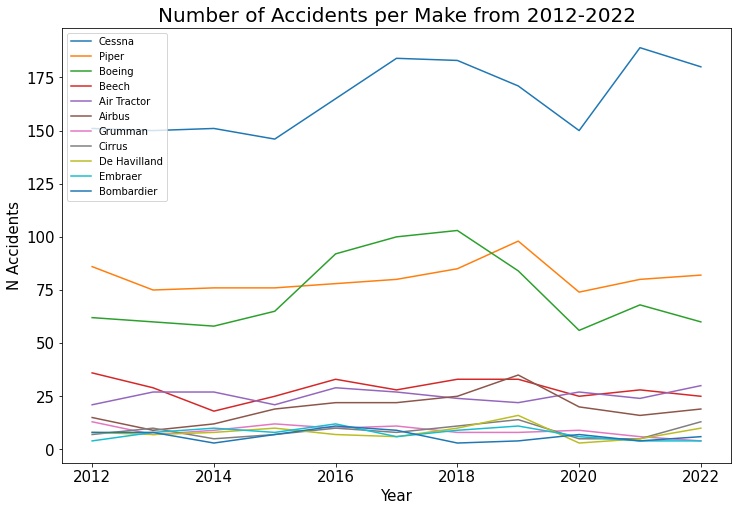

In [63]:
# plot n accidents over time per make - makes with th emost accident reports
years = sorted(list(df_year['Year'].value_counts().index))
makes = list(df_year['Make'].value_counts().index)
data = {}
fatal_data = {}

plt.figure(figsize=(12,8))
for make in makes:
    data[make] = []
    for year in years:
        try:
            group = df_group_year.get_group((make, year))
            n_accidents = len(group.value_counts())
            data[make].append(n_accidents)
        except KeyError:
            data[make].append(0)
    if sum(data[make]) >= 60:
        plt.plot(years, data[make], label=make)
plt.legend(loc='upper left')
plt.title('Number of Accidents per Make from 2012-2022', size=20)
plt.ylabel('N Accidents', size=15)
plt.xlabel('Year', size=15)


Text(0.5, 0, 'Year')

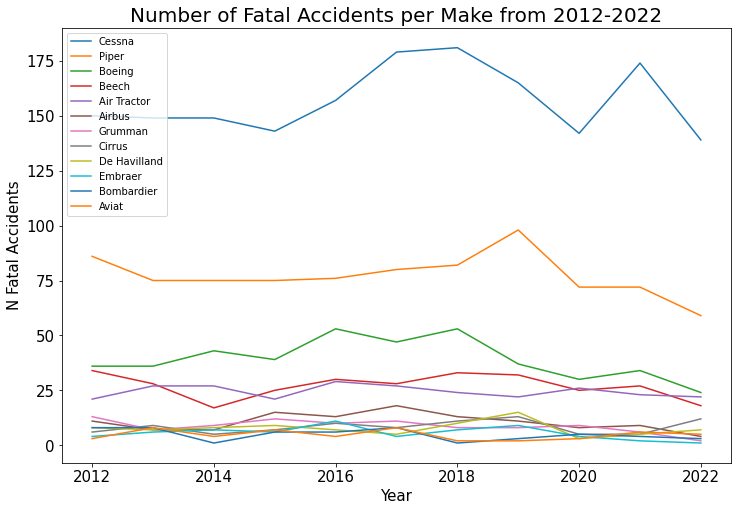

In [37]:
# plot n fatal accidents over time per make - makes with the most accient reports
years = sorted(list(df_year['Year'].value_counts().index))
makes = list(df_year['Make'].value_counts().index)
data = {}
fatal_data = {}

plt.figure(figsize=(12,8))
for make in makes:
    data[make] = []
    for year in years:
        try:
            group = df_fatal_year_group.get_group((make, year))
            n_accidents = len(group.value_counts())
            data[make].append(n_accidents)
        except KeyError:
            data[make].append(0)
    if sum(data[make]) >= 50:
        plt.plot(years, data[make], label=make)
plt.legend(loc='upper left')
plt.title('Number of Fatal Accidents per Make from 2012-2022', size=20)
plt.ylabel('N Fatal Accidents', size=15)
plt.xlabel('Year', size=15)

Text(0.5, 0, 'Year')

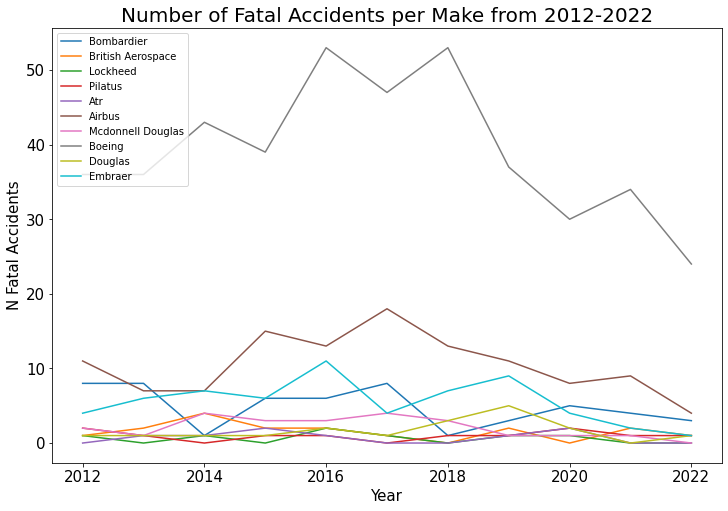

In [39]:
# plot n fatal accidents over time per make - 10 makes with the best ratios
years = sorted(list(df_year['Year'].value_counts().index))
makes = list(df_ratio.head(10)['Make'].value_counts().index)
data = {}
fatal_data = {}

plt.figure(figsize=(12,8))
for make in makes:
    data[make] = []
    for year in years:
        try:
            group = df_fatal_year_group.get_group((make, year))
            n_accidents = len(group.value_counts())
            data[make].append(n_accidents)
        except KeyError:
            data[make].append(0)
    if sum(data[make]) > 0:
        plt.plot(years, data[make], label=make)
plt.legend(loc='upper left')
plt.title('Number of Fatal Accidents per Make from 2012-2022', size=20)
plt.ylabel('N Fatal Accidents', size=15)
plt.xlabel('Year', size=15)

Get fatality ratios for models for the safest and biggest maakes: Boeing, Airbus

BOEING

In [42]:
# hard code combine Boeing Models into lines - (e.g. all 717 modesl together)
df_boeing = df_filtered.groupby('Make').get_group('Boeing').reset_index()

df_boeing['Model'] = df_boeing['Model'].map(lambda x: '707' if '707' in str(x) else x)
df_boeing['Model'] = df_boeing['Model'].map(lambda x: '717' if '717' in str(x) else x)
df_boeing['Model'] = df_boeing['Model'].map(lambda x: '727' if '727' in str(x) else x)
df_boeing['Model'] = df_boeing['Model'].map(lambda x: '737' if '737' in str(x) else x)
df_boeing['Model'] = df_boeing['Model'].map(lambda x: '747' if '747' in str(x) else x)
df_boeing['Model'] = df_boeing['Model'].map(lambda x: '744' if '744' in str(x) else x)
df_boeing['Model'] = df_boeing['Model'].map(lambda x: '757' if '757' in str(x) else x)
df_boeing['Model'] = df_boeing['Model'].map(lambda x: '767' if '767' in str(x) else x)
df_boeing['Model'] = df_boeing['Model'].map(lambda x: '777' if '777' in str(x) else x)
df_boeing['Model'] = df_boeing['Model'].map(lambda x: '787' if '787' in str(x) else x)
df_boeing['Model'] = df_boeing['Model'].map(lambda x: '797' if '797' in str(x) else x)
df_boeing['Model'] = df_boeing['Model'].map(lambda x: 'A75N1' if 'A75N1' in str(x) else x)
df_boeing['Model'] = df_boeing['Model'].map(lambda x: 'A75N1' if 'A 75N1' in str(x) else x)
df_boeing['Model'] = df_boeing['Model'].map(lambda x: 'B75N1' if 'B75-N1' in str(x) else x)
df_boeing['Model'] = df_boeing['Model'].map(lambda x: 'Md82' if '82' in str(x) else x)

df_boeing

,index,Event.Id,Investigation.Type,Event.Date,Latitude,Longitude,Airport.Name,Injury.Severity,Aircraft.damage,Aircraft.Category,...,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Make.and.Model,Year
0,50,20020917X02242,Accident,1982-01-06,NaN,NaN,NaN,Fatal,Substantial,Airplane,...,Unknown,0.0,1.0,0.0,1.0,IMC,Cruise,Probable Cause,Boeing A75,1982
1,242,20020917X02585,Accident,1982-02-06,NaN,NaN,MEDFORD-JACKSON COUNTY,Fatal,Minor,Airplane,...,Aerial Application,0.0,0.0,0.0,3.0,VMC,Taxi,Probable Cause,Boeing A75N1,1982
2,320,20020917X02336,Incident,1982-02-15,NaN,NaN,ONTARIO INTERNATIONAL,Incident,Minor,Airplane,...,Unknown,0.0,0.0,0.0,119.0,IMC,Approach,Probable Cause,Boeing B737-2H4,1982
3,351,20020917X02151,Incident,1982-02-19,NaN,NaN,HARLINGEN IND.AIR PARK,Incident,Unknown,Airplane,...,Uknown,NaN,NaN,NaN,83.0,IMC,Landing,Probable Cause,Boeing B-727-200,1982
4,506,20020917X02477,Incident,1982-03-08,NaN,NaN,MCCARRAN INTERNATL,Incident,Unknown,Airplane,...,Unknown,1.0,0.0,0.0,0.0,VMC,Standing,Probable Cause,Boeing 707-131B,1982
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1233,90062,20221003106034,Incident,2022-10-01,143553N,0120591E,Ninoy Aquino International Air,Fatal,Minor,Airplane,...,Uknown,0.0,0.0,0.0,368.0,UNK,Unknown,NaN,Boeing 777,2022
1234,90080,20221011106104,Accident,2022-10-03,362338N,1362427E,NaN,Minor,Unknown,Airplane,...,Uknown,0.0,1.0,0.0,105.0,UNK,Unknown,NaN,Boeing 737,2022
1235,90124,20221018106144,Incident,2022-10-14,635857N,0223740W,NaN,Unavailable,Minor,Airplane,...,Uknown,0.0,0.0,0.0,0.0,UNK,Unknown,NaN,Boeing 787-9,2022
1236,90231,20221114106279,Accident,2022-11-10,254812N,0801741W,NaN,Serious,Unknown,Airplane,...,Uknown,0.0,0.0,1.0,147.0,UNK,Unknown,NaN,Boeing 737-8,2022


Save Boeing DF to CSV

In [137]:
df_boeing.to_csv('boeing_data.csv')

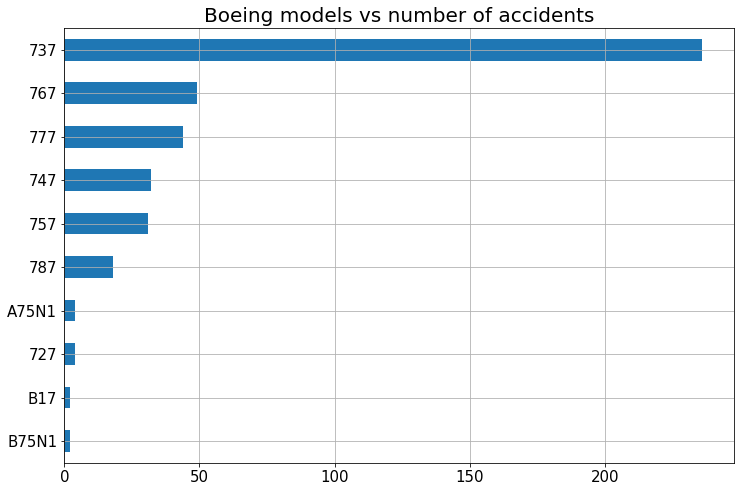

In [41]:
df_boeing['Model'].value_counts().head(10).sort_values().plot.barh(figsize=(12,8))
plt.title('Boeing models vs number of accidents', size=20)
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)
plt.grid()

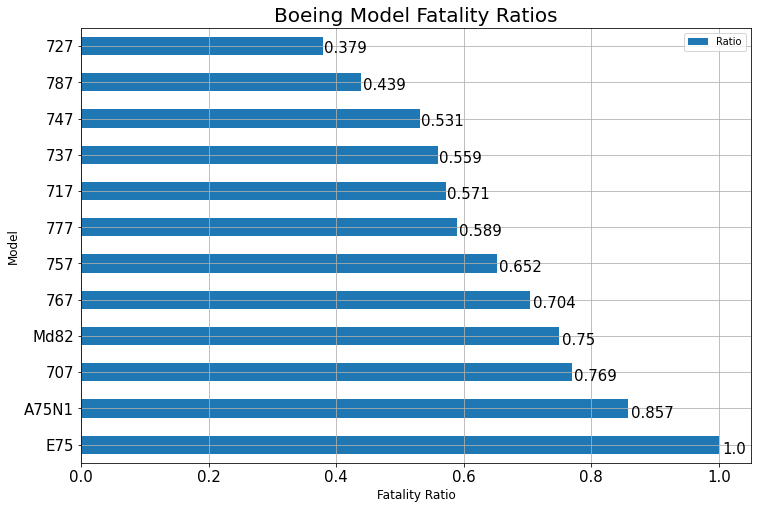

In [118]:
# get Boeing model fatality ratios
boeing_models = list(df_boeing['Model'].value_counts().index)
df_boeing_models = df_boeing.groupby('Model')
boeing_fatal_ratio = {
    'Model': [],
    'Ratio': []
}
for model in boeing_models:
    model_group = df_boeing_models.get_group(model).reset_index()
    n_tot_crashes = len(model_group)
    if n_tot_crashes > 3:
        n_fatal_crashes = len(model_group[model_group['Injury.Severity']=='Fatal'])
        ratio = n_fatal_crashes/n_tot_crashes
        boeing_fatal_ratio['Model'].append(model)
        boeing_fatal_ratio['Ratio'].append(ratio)
df_boeing_fatal_ratio = pd.DataFrame(boeing_fatal_ratio).sort_values(by="Ratio", ascending=False)
df_boeing_fatal_ratio = df_boeing_fatal_ratio.set_index('Model')

ax = df_boeing_fatal_ratio.plot(kind='barh', figsize=(12,8))
ax.set_title('Boeing Model Fatality Ratios', size=20)
ax.set_ylabel('Model', size=12)
ax.set_xlabel('Fatality Ratio', size=12)
ax.grid()

for p in ax.patches:
    plt.annotate(str(round(p.get_width(), 3)), (p.get_width() * 1.005, p.get_y() * 1.005), size=15)

AIRBUS

In [127]:
df_airbus = df_filtered.groupby('Make').get_group('Airbus').reset_index()

df_airbus['Model'] = df_airbus['Model'].map(lambda x: 'A300' if '300' in str(x) else x)
df_airbus['Model'] = df_airbus['Model'].map(lambda x: 'A310' if '310' in str(x) else x)
df_airbus['Model'] = df_airbus['Model'].map(lambda x: 'A319' if '319' in str(x) else x)
df_airbus['Model'] = df_airbus['Model'].map(lambda x: 'A320' if '320' in str(x) else x)
df_airbus['Model'] = df_airbus['Model'].map(lambda x: 'A321' if '321' in str(x) else x)
df_airbus['Model'] = df_airbus['Model'].map(lambda x: 'A330' if '330' in str(x) else x)
df_airbus['Model'] = df_airbus['Model'].map(lambda x: 'A340' if '340' in str(x) else x)
df_airbus['Model'] = df_airbus['Model'].map(lambda x: 'A380' if '380' in str(x) else x)

df_airbus['Model'].value_counts()

A320       121
A330        54
A319        40
A321        37
A300        20
A310         5
A380         5
A220         4
A340         1
F4-622R      1
Name: Model, dtype: int64

Save Airbus DF to CSV

In [138]:
df_airbus.to_csv('airbus_data.csv')

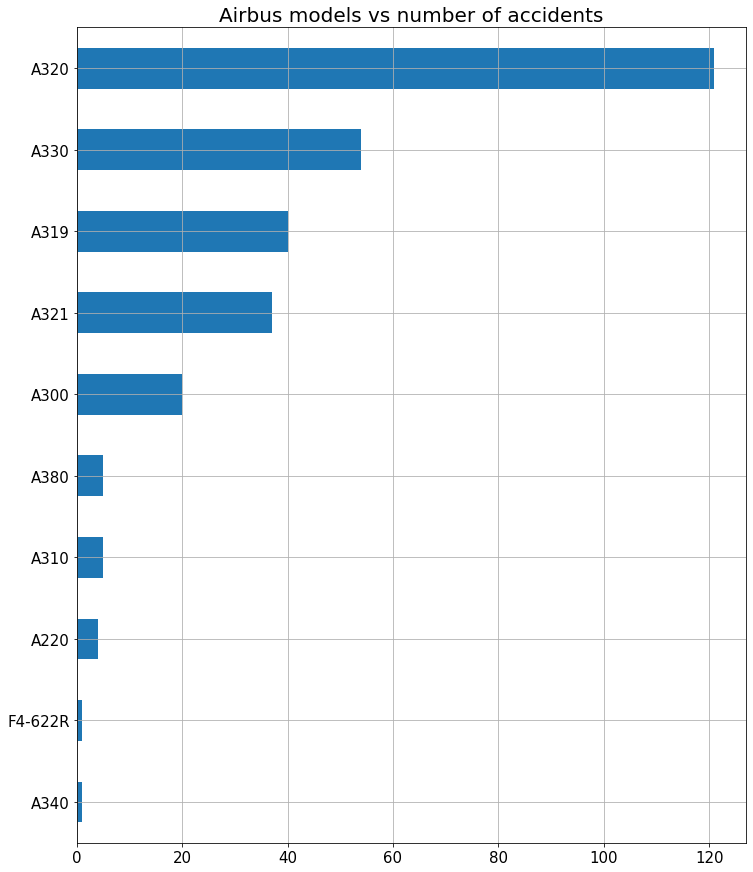

In [128]:
df_airbus['Model']
df_airbus['Model'].value_counts().head(10).sort_values().plot.barh(figsize=(12,15))
plt.title('Airbus models vs number of accidents', size=20)
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)
plt.grid()

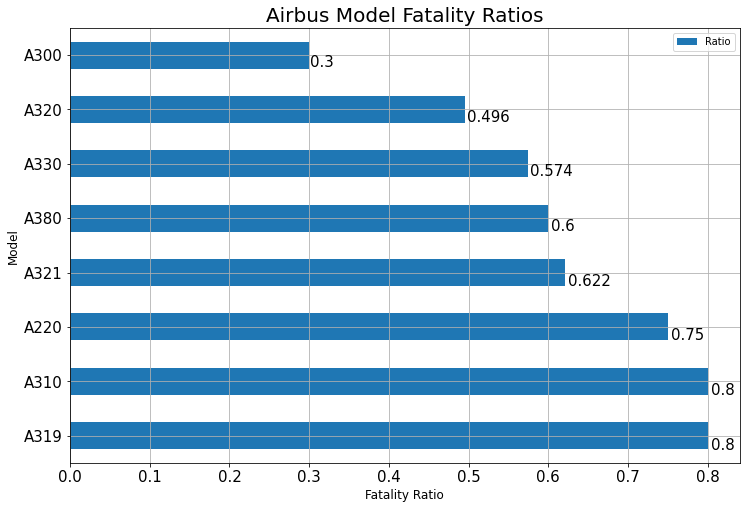

In [131]:
# get Airbus model fatality ratios
airbus_models = list(df_airbus['Model'].value_counts().index)
df_airbus_models = df_airbus.groupby('Model')
airbus_fatal_ratio = {
    'Model': [],
    'Ratio': []
}
for model in airbus_models:
    model_group = df_airbus_models.get_group(model).reset_index()
    n_tot_crashes = len(model_group)
    if n_tot_crashes > 3:
        n_fatal_crashes = len(model_group[model_group['Injury.Severity']=='Fatal'])
        ratio = n_fatal_crashes/n_tot_crashes
        airbus_fatal_ratio['Model'].append(model)
        airbus_fatal_ratio['Ratio'].append(ratio)
df_airbus_fatal_ratio = pd.DataFrame(airbus_fatal_ratio).sort_values(by="Ratio", ascending=False)
df_airbus_fatal_ratio = df_airbus_fatal_ratio.set_index('Model')

ax = df_airbus_fatal_ratio.plot(kind='barh', figsize=(12,8))
ax.set_title('Airbus Model Fatality Ratios', size=20)
ax.set_ylabel('Model', size=12)
ax.set_xlabel('Fatality Ratio', size=12)
ax.grid()

for p in ax.patches:
    plt.annotate(str(round(p.get_width(), 3)), (p.get_width() * 1.005, p.get_y() * 1.005), size=15)

Types of engines with the most crashes reported

Text(0.5, 0, 'Number of Accidents Reported')

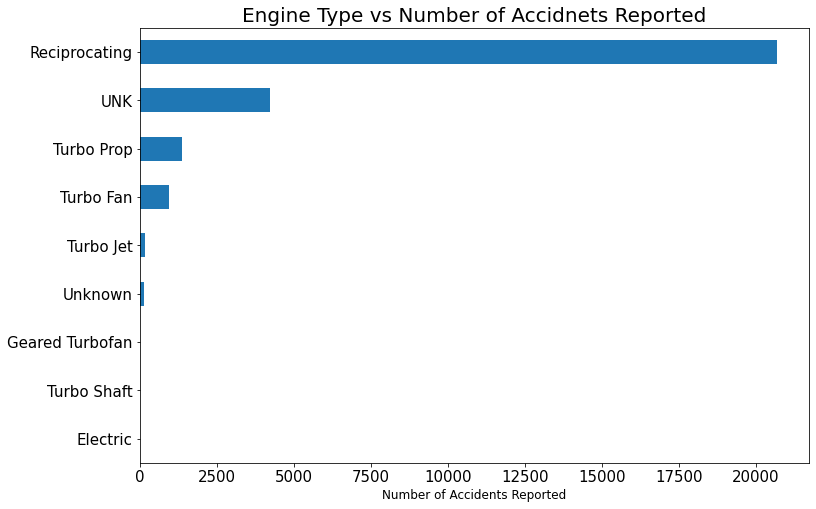

In [46]:
df['Engine.Type'].value_counts().sort_values().plot.barh(figsize=(12,8))
plt.title('Engine Type vs Number of Accidnets Reported', size=20)
plt.xlabel('Number of Accidents Reported', size=12)

Number of engines with the most accidents reported

Text(0, 0.5, 'Number of Engines')

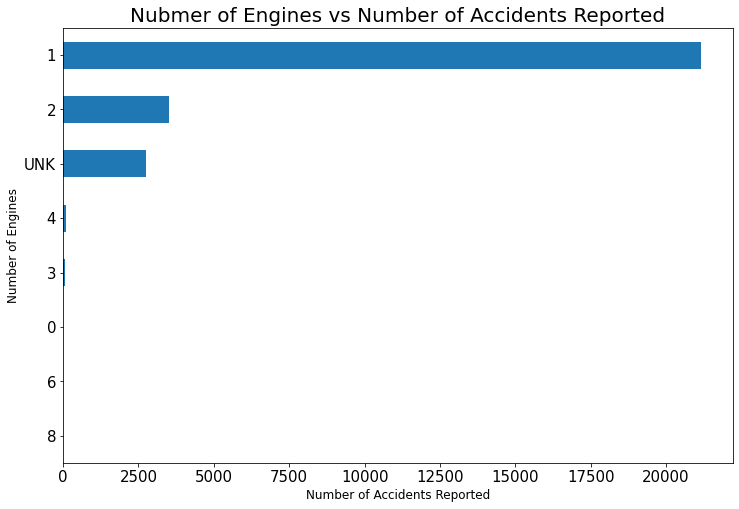

In [47]:
df['Number.of.Engines'].value_counts().sort_values().head(10).plot.barh(figsize=(12,8))
plt.title('Nubmer of Engines vs Number of Accidents Reported', size=20)
plt.xlabel('Number of Accidents Reported', size=12)
plt.ylabel('Number of Engines', size=12)

Number of engines with the most fatal accidents reported

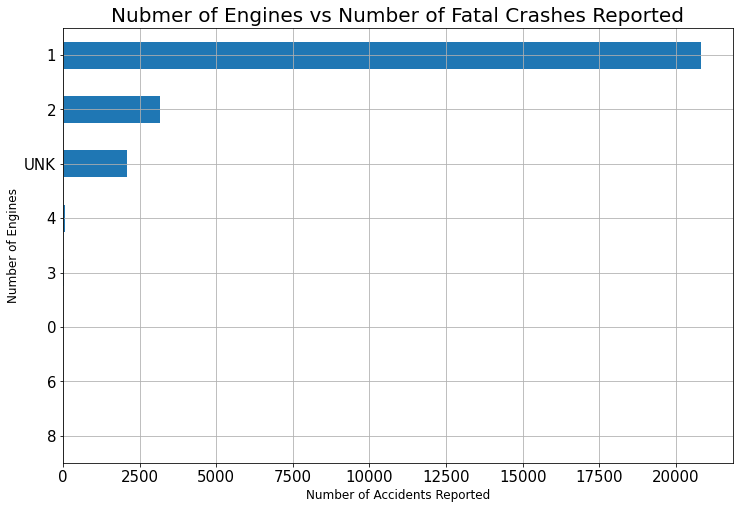

In [48]:
df_fatal = df[df['Injury.Severity'] == 'Fatal']
df_fatal['Number.of.Engines'].value_counts().sort_values().plot.barh(figsize=(12,8))
plt.title('Nubmer of Engines vs Number of Fatal Crashes Reported', size=20)
plt.xlabel('Number of Accidents Reported', size=12)
plt.ylabel('Number of Engines', size=12)
plt.grid()

Aircraft with most crashes in bad weather

In [49]:
df_bad_weather = df_filtered.groupby(['Weather.Condition']).get_group('IMC')
df_bad_weather['Make'].value_counts().head(10)

Cessna         150
Piper           84
Beech           73
Boeing          67
Airbus          19
Embraer         16
Bombardier      10
Cirrus          10
Swearingen       9
Air Tractor      7
Name: Make, dtype: int64